# Ensembles

In [1]:
import time
import datetime
import bz2

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Gradient boosting 

In [2]:
df = pd.read_csv('data_ML_19_05.csv', index_col=['date'], parse_dates=['date'], dayfirst=True)
df.head()

,close,close_change,open,high,low,volume,bb_bbh,bb_bbl,bb_bbm,ATR_10,...,ROCI_40,ROCI_60,ROCI_120,Vortex_diff,Vortex_neg,Vortex_pos,ichimoku_a,ichimoku_b,ichimoku_bl,ichimoku_cl
date,,,,,,,,,,,,,,,,,,,,,
2015-01-19,1.15947,1,1.190209,1.192707,1.183859,125293.70,1.224872,1.182937,1.203905,0.005052,...,0.000000,0.000000,0.000000,-0.292063,0.566607,0.274544,1.199552,1.202186,1.202186,1.196918
2015-06-08,1.12800,1,1.109748,1.115922,1.103201,178572.05,1.148248,1.085201,1.116725,0.011961,...,3.059706,3.102878,-6.589708,0.134893,0.930980,1.065874,1.113431,1.099360,1.111859,1.115003
2015-06-09,1.12926,1,1.108914,1.115403,1.102083,189387.35,1.147392,1.085082,1.116237,0.012098,...,2.952450,3.084663,-6.401610,0.114822,0.941023,1.055845,1.113217,1.099360,1.112258,1.114176
2015-06-10,1.13099,1,1.108156,1.115101,1.101890,191876.60,1.146536,1.084730,1.115633,0.012210,...,2.897022,3.109756,-6.191681,0.093968,0.952233,1.046201,1.113011,1.099360,1.112656,1.113366
2015-06-11,1.12458,0,1.108085,1.115129,1.102208,190246.55,1.145869,1.084101,1.114985,0.012281,...,2.946539,3.079194,-5.817274,0.076014,0.961502,1.037516,1.112856,1.099360,1.113054,1.112659


In [3]:
X_train = df.copy(deep=True)
X_train.drop(['close_change', 'close'],axis=1, inplace= True)
X_train.drop(X_train.index[-200:],inplace= True)
X_train = StandardScaler().fit_transform(X_train)
#X_train

In [4]:
X_test = df.copy(deep=True)
X_test.drop(['close_change', 'close'],axis=1, inplace= True)
X_test.drop(X_test.index[:-200],inplace= True)
X_test = StandardScaler().fit_transform(X_test)
#X_test

In [5]:
y_train =  df['close'][:-200]

In [6]:
date_list = df.index[-200:].to_list()


Learing rate is: 2
      Iter       Train Loss   Remaining Time 
         1           0.0018            4.98s
         2           0.0018            4.96s
         3           0.0018            5.76s
         4           0.0018            4.92s
         5           0.0018            4.90s
         6           0.0018            4.47s
         7           0.0018            4.51s
         8           0.0018            4.24s
         9           0.0018            4.02s
        10           0.0018            4.08s
        20           0.0018            3.34s
        30           0.0018            3.01s
        40           0.0018            2.78s
        50           0.0018            2.64s
        60           0.0018            2.47s
        70           0.0018            2.31s
        80           0.0018            2.17s
        90           0.0018            2.04s
       100           0.0018            1.91s
       200           0.0018            0.62s
score -5.10702591327572e-15


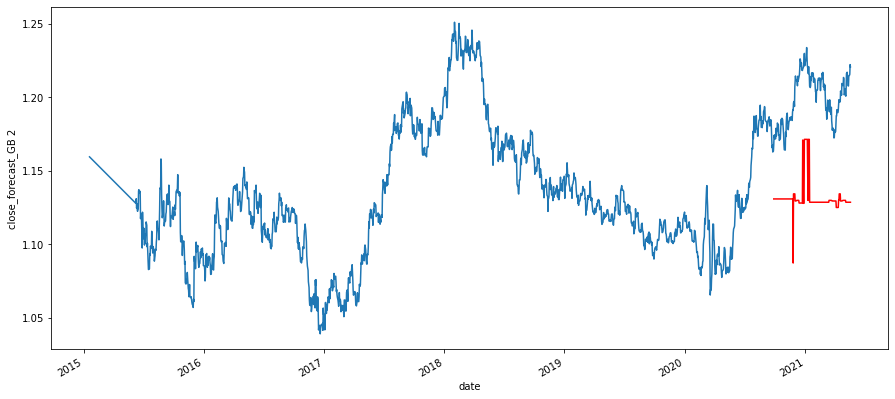


Learing rate is: 1
      Iter       Train Loss   Remaining Time 
         1           0.0001            2.49s
         2           0.0001            3.72s
         3           0.0001            3.29s
         4           0.0001            3.08s
         5           0.0001            3.43s
         6           0.0001            3.25s
         7           0.0001            3.12s
         8           0.0001            3.03s
         9           0.0000            3.21s
        10           0.0000            3.12s
        20           0.0000            2.99s
        30           0.0000            2.79s
        40           0.0000            2.68s
        50           0.0000            2.56s
        60           0.0000            2.41s
        70           0.0000            2.29s
        80           0.0000            2.17s
        90           0.0000            2.03s
       100           0.0000            1.89s
       200           0.0000            0.63s
score 0.99985197538779


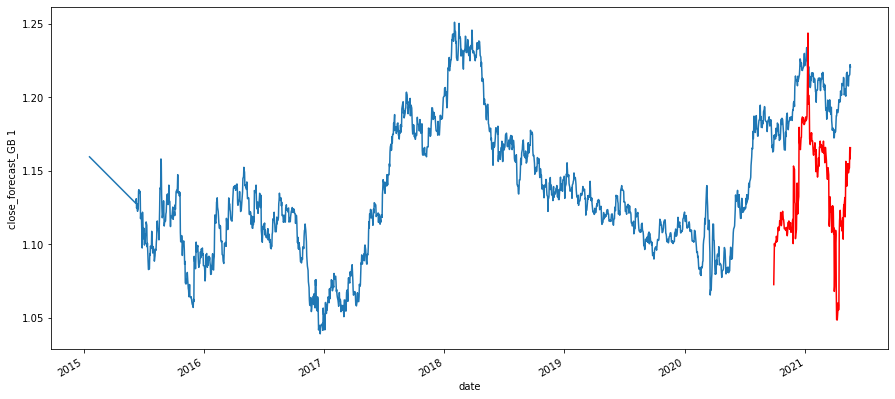


Learing rate is: 0.5
      Iter       Train Loss   Remaining Time 
         1           0.0006            4.98s
         2           0.0002            3.72s
         3           0.0001            4.12s
         4           0.0001            3.69s
         5           0.0001            3.43s
         6           0.0001            3.66s
         7           0.0001            3.47s
         8           0.0001            3.33s
         9           0.0001            3.21s
        10           0.0001            3.36s
        20           0.0000            2.99s
        30           0.0000            2.86s
        40           0.0000            2.68s
        50           0.0000            2.56s
        60           0.0000            2.44s
        70           0.0000            2.29s
        80           0.0000            2.17s
        90           0.0000            2.03s
       100           0.0000            1.91s
       200           0.0000            0.63s
score 0.9995045595733669


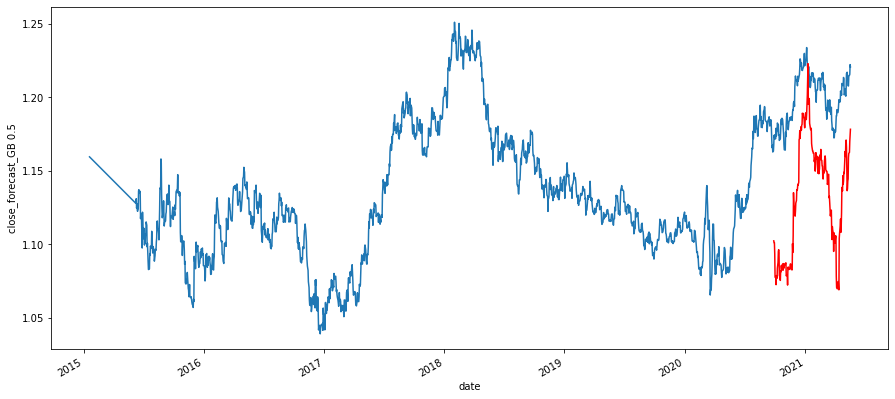


Learing rate is: 0.3
      Iter       Train Loss   Remaining Time 
         1           0.0010            2.49s
         2           0.0005            3.72s
         3           0.0003            3.29s
         4           0.0002            3.08s
         5           0.0002            2.94s
         6           0.0001            3.25s
         7           0.0001            3.12s
         8           0.0001            3.02s
         9           0.0001            2.95s
        10           0.0001            3.12s
        20           0.0000            2.88s
        30           0.0000            2.79s
        40           0.0000            2.68s
        50           0.0000            2.52s
        60           0.0000            2.41s
        70           0.0000            2.29s
        80           0.0000            2.17s
        90           0.0000            2.03s
       100           0.0000            1.91s
       200           0.0000            0.63s
score 0.9986248769196451


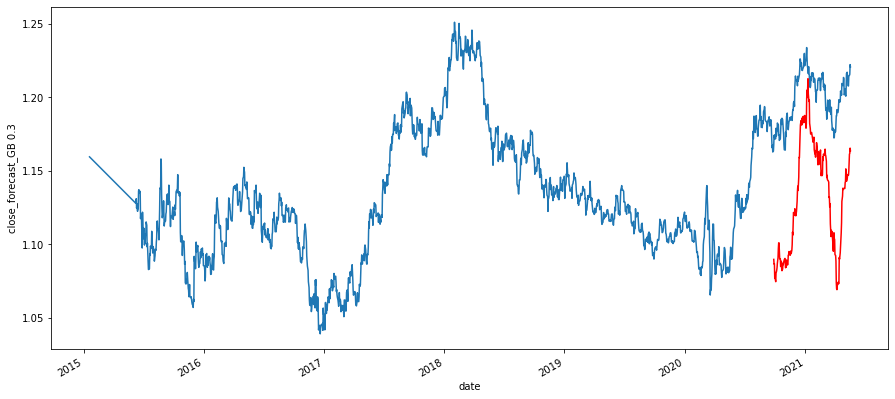


Learing rate is: 0.2
      Iter       Train Loss   Remaining Time 
         1           0.0012            2.49s
         2           0.0008            2.48s
         3           0.0006            2.47s
         4           0.0004            3.07s
         5           0.0003            2.94s
         6           0.0002            2.85s
         7           0.0002            3.12s
         8           0.0001            3.02s
         9           0.0001            2.95s
        10           0.0001            2.88s
        20           0.0001            2.89s
        30           0.0000            2.76s
        40           0.0000            2.65s
        50           0.0000            2.52s
        60           0.0000            2.38s
        70           0.0000            2.27s
        80           0.0000            2.13s
        90           0.0000            2.01s
       100           0.0000            1.89s
       200           0.0000            0.63s
score 0.9972746003970838


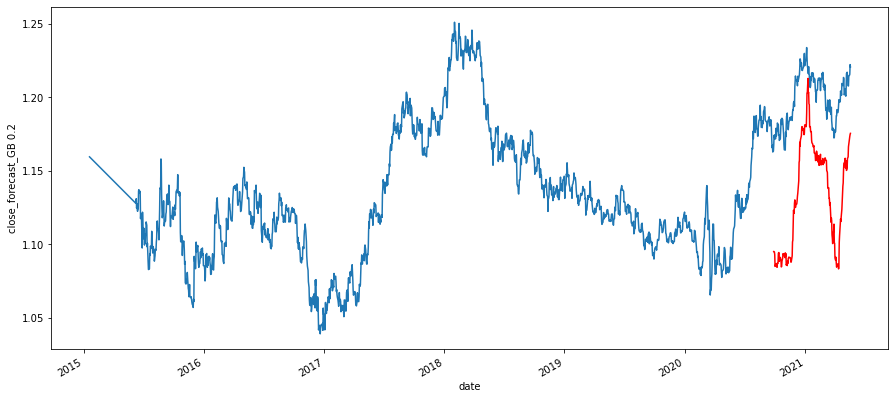


Learing rate is: 0.1
      Iter       Train Loss   Remaining Time 
         1           0.0015            2.49s
         2           0.0012            3.72s
         3           0.0010            3.29s
         4           0.0009            3.08s
         5           0.0007            2.94s
         6           0.0006            3.25s
         7           0.0005            3.12s
         8           0.0004            3.03s
         9           0.0004            2.95s
        10           0.0003            3.12s
        20           0.0001            2.88s
        30           0.0001            2.79s
        40           0.0001            2.63s
        50           0.0001            2.52s
        60           0.0000            2.41s
        70           0.0000            2.29s
        80           0.0000            2.17s
        90           0.0000            2.04s
       100           0.0000            1.91s
       200           0.0000            0.64s
score 0.9929361839329749


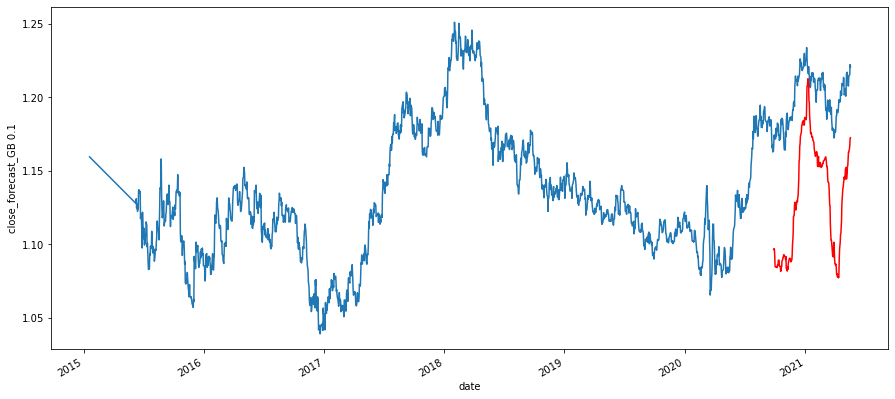


Learing rate is: 0.05
      Iter       Train Loss   Remaining Time 
         1           0.0017            2.49s
         2           0.0015            2.48s
         3           0.0014            3.29s
         4           0.0013            3.08s
         5           0.0011            2.94s
         6           0.0010            2.85s
         7           0.0010            3.12s
         8           0.0009            3.03s
         9           0.0008            2.95s
        10           0.0007            3.12s
        20           0.0003            2.88s
        30           0.0002            2.71s
        40           0.0001            2.57s
        50           0.0001            2.48s
        60           0.0001            2.34s
        70           0.0001            2.21s
        80           0.0001            2.10s
        90           0.0001            1.97s
       100           0.0000            1.86s
       200           0.0000            0.63s
score 0.9857362549297067


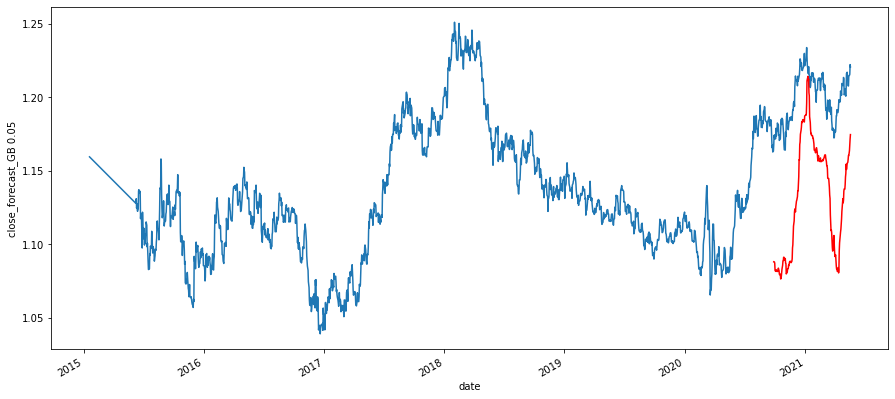


Learing rate is: 0.01
      Iter       Train Loss   Remaining Time 
         1           0.0018            4.98s
         2           0.0017            3.72s
         3           0.0017            3.29s
         4           0.0017            3.07s
         5           0.0017            3.43s
         6           0.0016            3.25s
         7           0.0016            3.12s
         8           0.0016            3.02s
         9           0.0015            3.21s
        10           0.0015            3.12s
        20           0.0013            2.88s
        30           0.0011            2.71s
        40           0.0009            2.63s
        50           0.0007            2.48s
        60           0.0006            2.34s
        70           0.0005            2.21s
        80           0.0005            2.10s
        90           0.0004            1.97s
       100           0.0003            1.85s
       200           0.0001            0.61s
score 0.9511507850577318


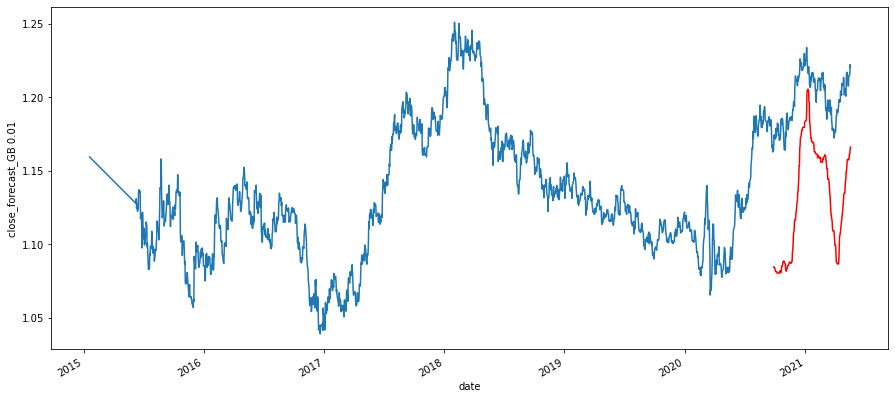


Learing rate is: 0.0075
      Iter       Train Loss   Remaining Time 
         1           0.0018            2.49s
         2           0.0018            2.48s
         3           0.0017            2.47s
         4           0.0017            3.08s
         5           0.0017            2.94s
         6           0.0017            2.85s
         7           0.0016            3.12s
         8           0.0016            3.03s
         9           0.0016            2.95s
        10           0.0016            2.88s
        20           0.0014            2.88s
        30           0.0012            2.71s
        40           0.0011            2.57s
        50           0.0009            2.48s
        60           0.0008            2.34s
        70           0.0007            2.21s
        80           0.0006            2.08s
        90           0.0006            1.97s
       100           0.0005            1.85s
       200           0.0002            0.61s
score 0.9271821458143585


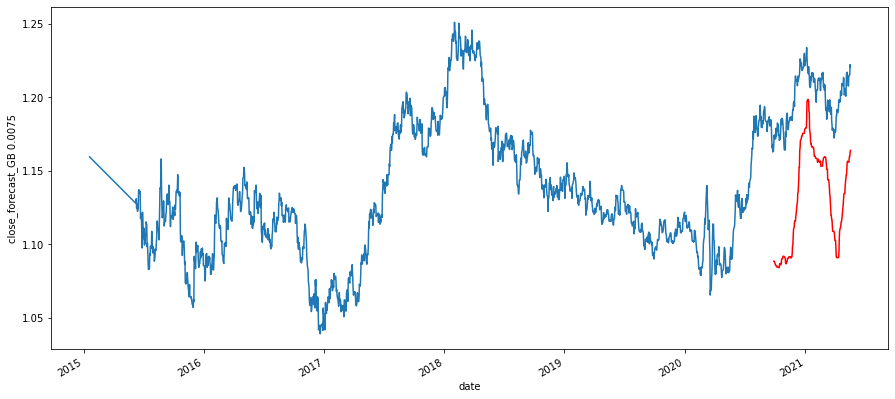


Learing rate is: 0.005
      Iter       Train Loss   Remaining Time 
         1           0.0018            2.49s
         2           0.0018            2.48s
         3           0.0018            3.29s
         4           0.0017            3.08s
         5           0.0017            2.94s
         6           0.0017            3.25s
         7           0.0017            3.12s
         8           0.0017            3.03s
         9           0.0017            2.95s
        10           0.0017            3.12s
        20           0.0015            2.88s
        30           0.0014            2.71s
        40           0.0013            2.63s
        50           0.0012            2.52s
        60           0.0011            2.38s
        70           0.0010            2.24s
        80           0.0009            2.10s
        90           0.0008            1.99s
       100           0.0008            1.86s
       200           0.0003            0.63s
score 0.8619940824946353


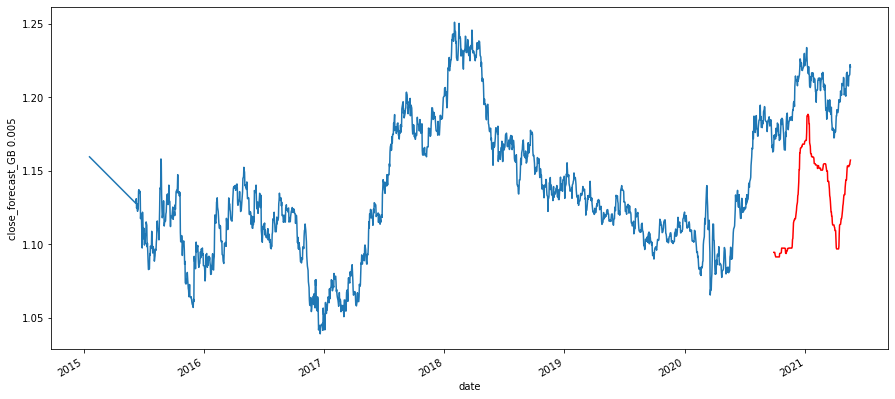


Learing rate is: 0.003
      Iter       Train Loss   Remaining Time 
         1           0.0018            2.49s
         2           0.0018            3.72s
         3           0.0018            3.29s
         4           0.0018            3.08s
         5           0.0018            3.43s
         6           0.0018            3.25s
         7           0.0017            3.12s
         8           0.0017            3.03s
         9           0.0017            3.21s
        10           0.0017            3.12s
        20           0.0016            2.88s
        30           0.0015            2.71s
        40           0.0015            2.63s
        50           0.0014            2.48s
        60           0.0013            2.38s
        70           0.0012            2.24s
        80           0.0012            2.10s
        90           0.0011            1.97s
       100           0.0011            1.86s
       200           0.0006            0.62s
score 0.7220483720172222


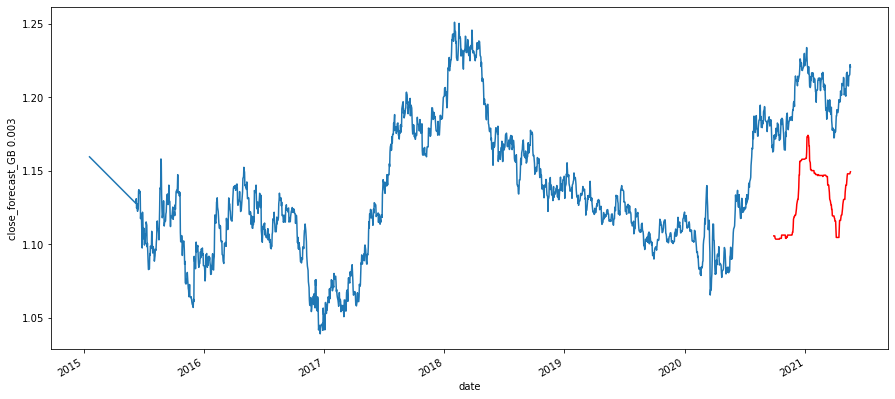


Learing rate is: 0.001
      Iter       Train Loss   Remaining Time 
         1           0.0018            2.49s
         2           0.0018            3.72s
         3           0.0018            3.29s
         4           0.0018            3.07s
         5           0.0018            3.43s
         6           0.0018            3.25s
         7           0.0018            3.12s
         8           0.0018            3.02s
         9           0.0018            3.21s
        10           0.0018            3.12s
        20           0.0017            2.88s
        30           0.0017            2.71s
        40           0.0017            2.63s
        50           0.0017            2.48s
        60           0.0016            2.38s
        70           0.0016            2.24s
        80           0.0016            2.10s
        90           0.0015            1.99s
       100           0.0015            1.86s
       200           0.0013            0.62s
score 0.3630531661253723


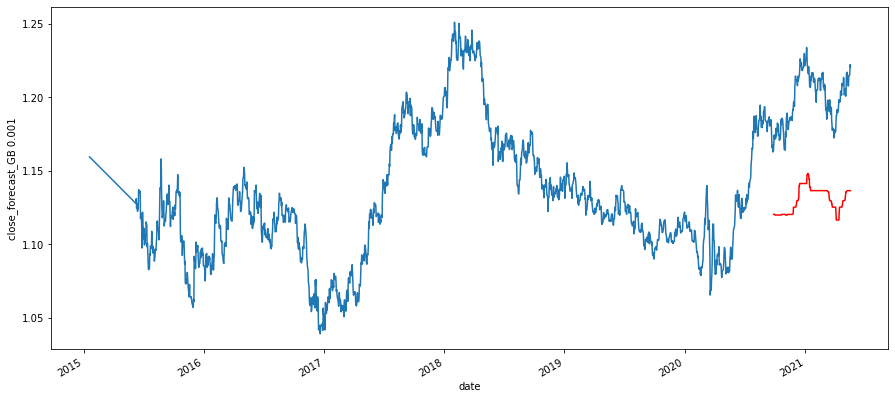

In [7]:
learning_rates =  [2, 1, 0.5, 0.3, 0.2, 0.1, 0.05, 0.01, 0.0075 , 0.005, 0.003 ,0.001]
dict_train = {}
dict_test = {}
for learning_rate in learning_rates:
    print("\nLearing rate is:", learning_rate)
    model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=250, verbose=True, random_state=241)
    model.fit(X_train, y_train)
    model.predict(X_test)
    
    print("score", model.score(X_train, y_train))

    future = pd.DataFrame(index=date_list)
    future['forecast'] = model.predict(X_test)
    
    plt.figure(figsize(15,7))
    df.close.plot()
    future['forecast'].plot(color='r')
    plt.ylabel('close_forecast_GB ' + str(learning_rate))
    pylab.show()

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score

In [9]:
cv = KFold(shuffle=False)

In [10]:
Estimators_list = [5, 10, 25, 50, 75, 100, 300, 500]


Estimators: 5
score 0.9966527216061861


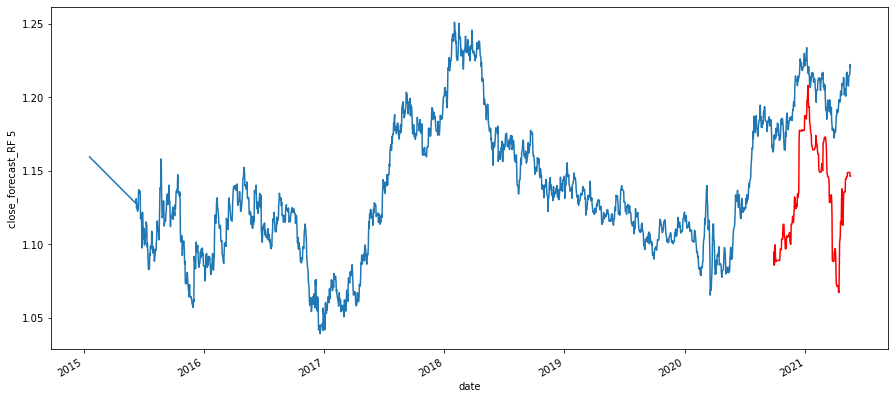


Estimators: 10
score 0.9975292096424486


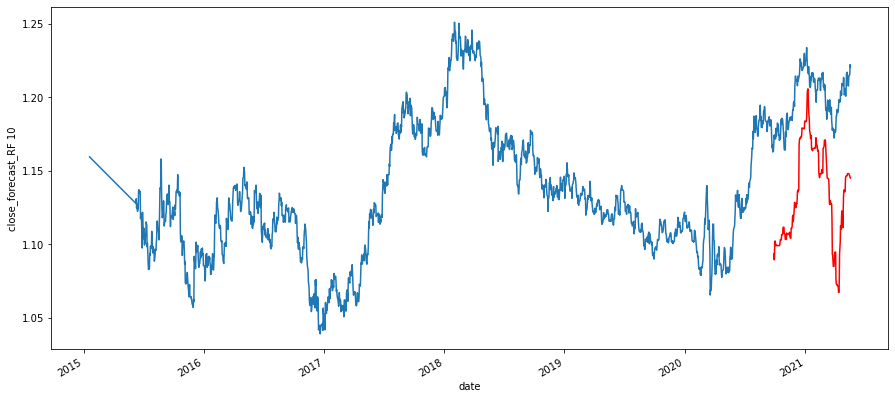


Estimators: 25
score 0.9980264793348019


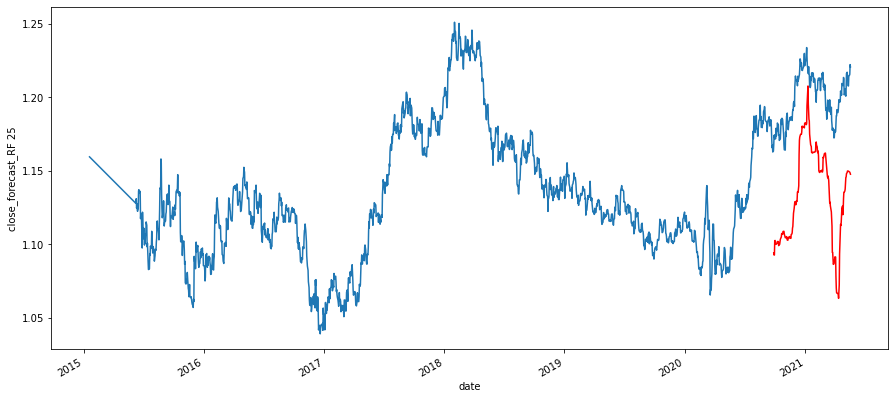


Estimators: 50
score 0.9982325686980537


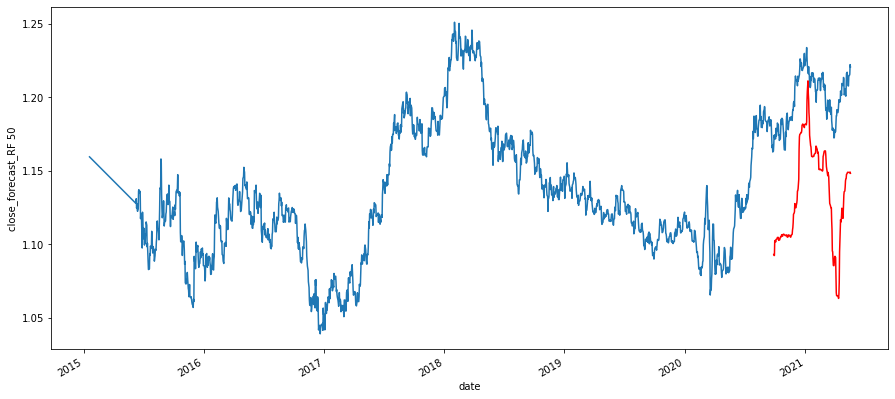


Estimators: 75
score 0.9982963449860329


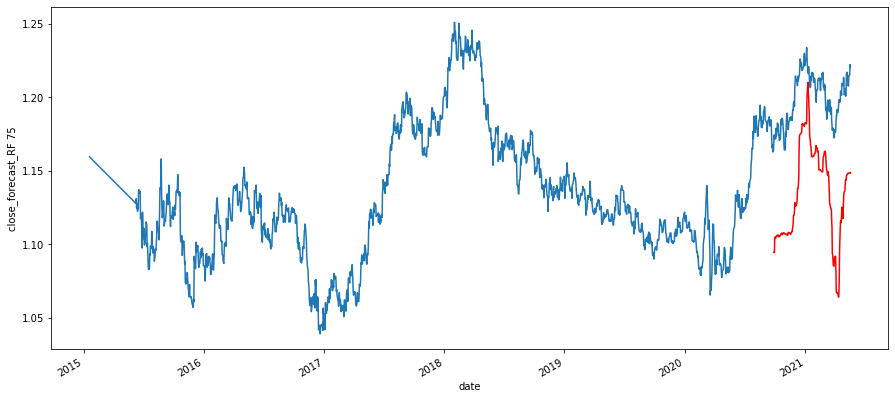


Estimators: 100
score 0.9983038574909718


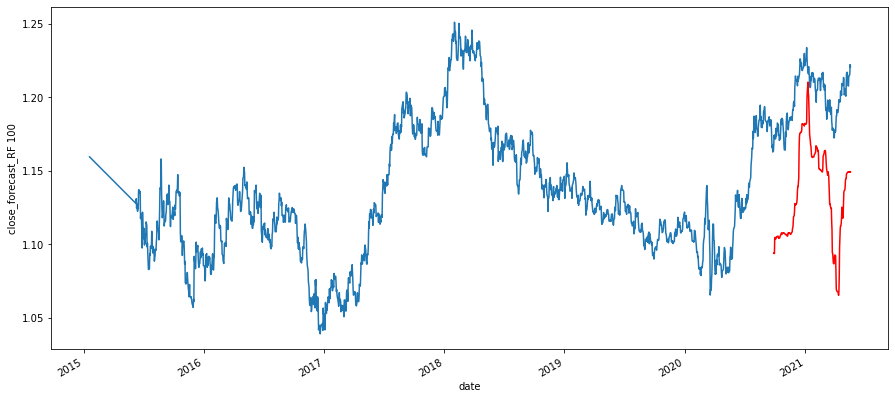


Estimators: 300
score 0.9983519584232877


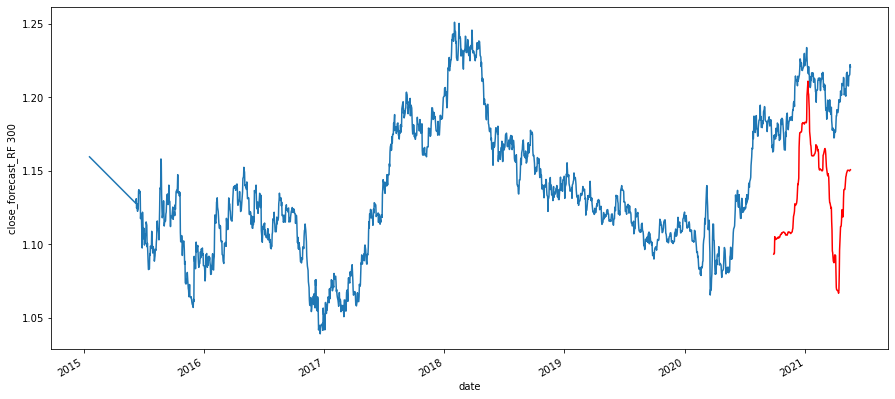


Estimators: 500
score 0.9983788934398505


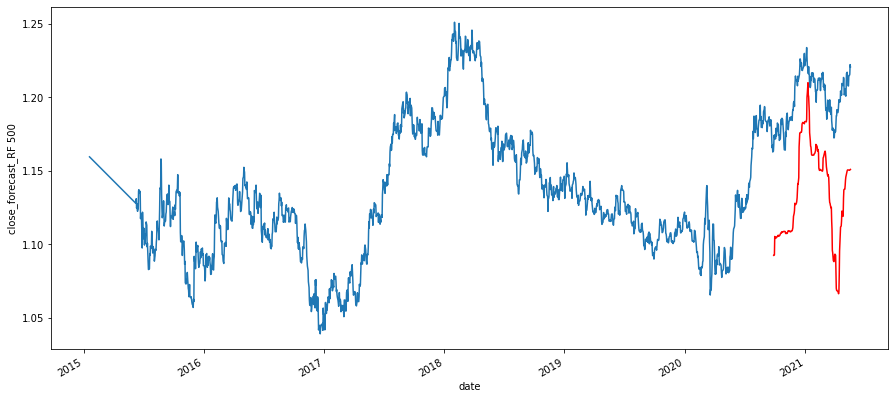

In [11]:
for i in Estimators_list:
    print("\nEstimators:", i)
    model = RandomForestRegressor(random_state=1, n_estimators=i)

    model.fit(X_train, y_train)
    model.predict(X_test)
    
    print("score", model.score(X_train, y_train))

    future = pd.DataFrame(index=date_list)
    future['forecast'] = model.predict(X_test)
    
    plt.figure(figsize(15,7))
    df.close.plot()
    future['forecast'].plot(color='r')
    plt.ylabel('close_forecast_RF ' + str(i))
    pylab.show()